In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchtrainer import Trainer

In [2]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.dropout1 = nn.Dropout(0.25)
        self.fc1 = nn.Linear(64 * 12 * 12, 128)
        self.dropout2 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = self.dropout1(x.view(-1, self.fc1.in_features))
        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        return F.log_softmax(self.fc2(x), 1)

In [3]:
transform = transforms.ToTensor()
# Download MNIST dataset
root_dir = "data/"
train_dataset = datasets.MNIST(root_dir, train=True, transform=transform, 
                               download=True)
test_dataset = datasets.MNIST(root_dir, train=False, transform=transform, 
                              download=True)

# Make train and test Dataloader
BATCH_SIZE = 128
epochs = 50
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, 
                         shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, 
                        shuffle=False, num_workers=4)

In [4]:
# Instanciate model and set optimizer and loss function
net = Net()
loss_fn = F.nll_loss
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

trainer = Trainer(net, loss_fn, optimizer)
print("Number of trainable parameters: %d" % trainer.get_num_parameters())

Number of trainable parameters: 1199882


Epoch 1/50
469/469 [====================] - 5s 738ms - t_loss: 0.2705 - t_acc: 91.9948 - v_loss: 0.0556 - v_acc: 98.2199
Model improved, saved at models/checkpoint.tar
Epoch 2/50
469/469 [====================] - 5s 636ms - t_loss: 0.0902 - t_acc: 97.3781 - v_loss: 0.0420 - v_acc: 98.6254
Model improved, saved at models/checkpoint.tar
Epoch 3/50
469/469 [====================] - 5s 752ms - t_loss: 0.0696 - t_acc: 97.9550 - v_loss: 0.0402 - v_acc: 98.6452
Model improved, saved at models/checkpoint.tar
Epoch 4/50
469/469 [====================] - 5s 767ms - t_loss: 0.0605 - t_acc: 98.1238 - v_loss: 0.0338 - v_acc: 98.8430
Model improved, saved at models/checkpoint.tar
Epoch 5/50
469/469 [====================] - 5s 683ms - t_loss: 0.0515 - t_acc: 98.4347 - v_loss: 0.0324 - v_acc: 98.9023
Model improved, saved at models/checkpoint.tar
Epoch 6/50
469/469 [====================] - 5s 734ms - t_loss: 0.0450 - t_acc: 98.6335 - v_loss: 0.0335 - v_acc: 98.9419
No improvement in 1 Epochs.
Epoch 7/50


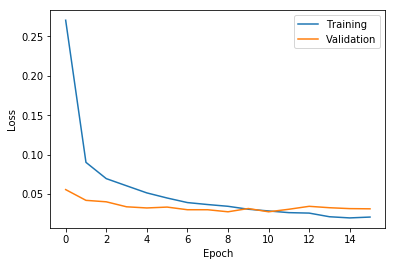

In [5]:
trainer.fit(train_loader, val_loader=test_loader, epochs=epochs, verbose=1,
          checkpoint_path="models/checkpoint.tar", plot_loss=True, early_stopping=5)